In [2]:
import tick
import numpy as np
from collections import Counter
from tick.hawkes import SimuPoissonProcess
from tick.plot import plot_point_process
import matplotlib.pyplot as plt

In [50]:
def poisson_jumps(intensity = 0.5, std = 0.015, run_time = 21600):
    """
    Generate a poisson process that can be later added to the rt. Intenisity is lambda,
    std stands for the standard deviation of the jump size from a standard normal distribution.
    
    The tick/Collections library is used for modelling in Python
    """
    #Set up the model and run the simulation - tick library
    poisson = SimuPoissonProcess(intensity, end_time = run_time, verbose = False)
    poisson.simulate()
    
    #Get the discrete time stamps. This can lead to an event that time t has two jumps.
    #As the Poisson process generation is not discrete.
    t_poisson = np.around(poisson.timestamps[0])
    
    #Get the number of jumps at time t in a dictionary
    t_poisson_discrete = Counter(t_poisson)
    
    #Initialize empty np array to fill with values
    t_jumps = np.zeros(21600)
    
    #Working around the fact that we have a dictionary - makes indexing harder
    
    #minus 1 due to indexing
    t_poisson_index = [int(i)-1 for i in list(t_poisson_discrete.keys())]
    t_poisson_value = [int(i) for i in list(t_poisson_discrete.values())]
    
    #Fill the values for the poisson process
    t_jumps[t_poisson_index] = t_poisson_value * np.random.normal(loc = 0, scale = 0.015, size = len(t_poisson_value))
    
    return t_jumps
    

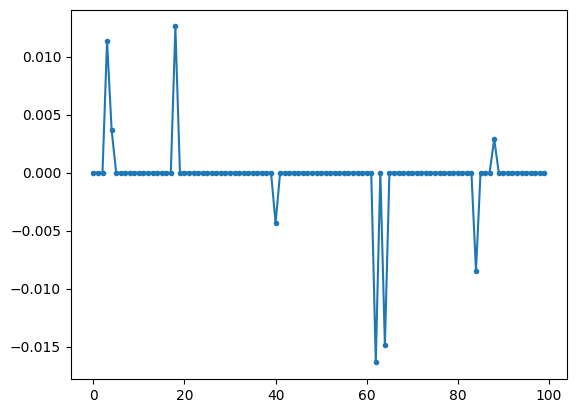

In [9]:
tt = poisson_jumps(intensity = 0.15)
plt.plot(tt[0:100], marker = ".")

In [44]:
def double_exp_jump(lambda_positive = 0.0394, lambda_negative = 0.0646, eta_positive = 0.15, eta_negative = 0.1725,
                    run_time = 21600):
    """
    Generate a double exponential poisson process that can be later added to the rt. Negative/Positive parameters
    are used to define the separate poisson processes.
    
    The tick/Collections library is used for modelling in Python
    """
    
    #Initialize "positive and negativ" processes
    poisson_positive = SimuPoissonProcess(lambda_positive, end_time = run_time, verbose = False)
    poisson_negative = SimuPoissonProcess(lambda_negative, end_time = run_time, verbose = False)
    
    poisson_positive.simulate()
    poisson_negative.simulate()
    
    #Define timestamps
    t_poisson_positive = np.around(poisson_positive.timestamps[0])
    t_poisson_negative = np.around(poisson_negative.timestamps[0])

    #Get the number of jumps at time t in a dictionary
    t_poisson_discrete_positive = Counter(t_poisson_positive)
    t_poisson_discrete_negative = Counter(t_poisson_negative)

    #Initialize empty np array to fill with values
    t_jumps_positive = np.zeros(21600)
    t_jumps_negative = np.zeros(21600)
    
    #minus 1 due to indexing
    t_poisson_index_positive = [int(i)-1 for i in list(t_poisson_discrete_positive.keys())]
    t_poisson_index_negative = [int(i)-1 for i in list(t_poisson_discrete_negative.keys())]
    
    t_poisson_value_positive = [int(i) for i in list(t_poisson_discrete_positive.values())]
    t_poisson_value_negative = [int(i) for i in list(t_poisson_discrete_negative.values())]
    
    #Fill the values for the poisson process
    t_jumps_positive[t_poisson_index_positive] = t_poisson_value_positive * np.random.exponential(scale = eta_positive, size = len(t_poisson_value_positive))
    
    #Multiply by -1 as these are negative jumps
    t_jumps_negative[t_poisson_index_negative] = t_poisson_value_negative * np.random.exponential(scale = eta_negative, size = len(t_poisson_value_negative))
    t_jumps_negative = -1* t_jumps_negative
    
    #Add positive and negative part 
    t_jumps_all = t_jumps_positive + t_jumps_negative
    
    return t_jumps_all
    

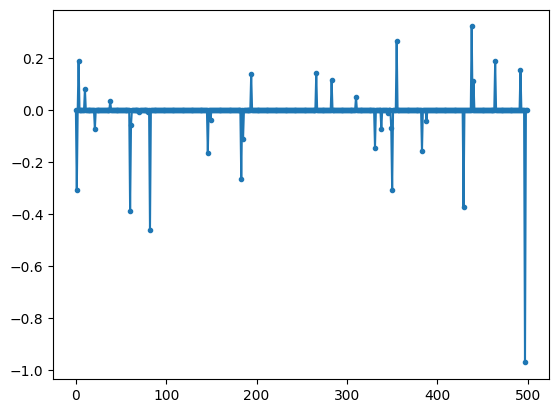

In [49]:
tt = double_exp_jump()

plt.plot(tt[500:1000], marker = ".")